# Synthetic Dataset

This sub-repository contains the Python notebooks for the tutorial "Survival of the Fittest: Classical and Machine Learning Methods for Time-to-Event Modeling" of D. Meier and A. Sturge for the Data Science Working Group of the Swiss Actuarial Association, see https://actuarialdatascience.org.

We start by creating the same dataset as in the tutorial "Privacy-preserving Machine Learning", see Case Study 15 on https://actuarialdatascience.org/ADS-Tutorials/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sys
import importlib

modules = [
    'pandas',
    'seaborn',
    'matplotlib',
    'numpy',
    'sklearn'
]

print(f"Python version: {sys.version}\n")

for module in modules:
    try:
        mod = importlib.import_module(module)
        version = getattr(mod, '__version__', 'built-in or no __version__')
        print(f"{module} version: {version}")
    except ImportError:
        print(f"{module} is not installed.")

sns.set()

Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]

pandas version: 1.5.3
seaborn version: 0.13.2
matplotlib version: 3.9.2
numpy version: 1.26.4
sklearn version: 1.2.2


In [2]:
def qrisk3(age, gender, height, weight, tcl_hdl_ratio, sbp, sd_sbp):
  age = np.maximum(age, 25 - 10*np.tanh((25 - age)/10)) # extension to below age 25
  if gender == "female":
    age_1 = np.power(age/10, -2)
    age_2 = age/10
    bmi   = weight/height/height*10000
    bmi_1 = np.power(bmi/10,-2)
    bmi_2 = np.power(bmi/10,-2)*np.log(bmi/10)

    age_1         = age_1 - 0.053274843841791
    age_2         = age_2 - 4.332503318786621
    bmi_1         = bmi_1 - 0.154946178197861
    bmi_2         = bmi_2 - 0.144462317228317
    tcl_hdl_ratio = tcl_hdl_ratio - 3.476326465606690
    sbp           = sbp - 123.130012512207030
    sd_sbp        = sd_sbp - 9.002537727355957

    # additive parts of effects
    a = age_1 * -8.1388109247726188 + age_2 * 0.79733376689699098 + bmi_1 * 0.29236092275460052 + bmi_2 * -4.1513300213837665 + tcl_hdl_ratio * 0.15338035820802554 + sbp * 0.013131488407103424 + sd_sbp * 0.0078894541014586095

    # interaction parts
    a += age_1 * bmi_1 * 23.802623412141742 + age_1 * bmi_2 * -71.184947692087007 + age_1 * sbp * 0.034131842338615485 + age_2 * bmi_1 * 0.52369958933664429 + age_2 * bmi_2 * 0.045744190122323759 + age_2 * sbp * -0.0015082501423272358

    return 1 - np.power(0.988876402378082, np.exp(a))

  else:
    age_1 = np.power(age/10, -1)
    age_2 = np.power(age/10, 3)
    bmi   = weight/height/height*10000
    bmi_1 = np.power(bmi/10,-2)
    bmi_2 = np.power(bmi/10,-2)*np.log(bmi/10)

    age_1         = age_1 - 0.234766781330109
    age_2         = age_2 - 77.284080505371094
    bmi_1         = bmi_1 - 0.149176135659218
    bmi_2         = bmi_2 - 0.141913309693336
    tcl_hdl_ratio = tcl_hdl_ratio - 4.300998687744141
    sbp           = sbp - 128.571578979492190
    sd_sbp        = sd_sbp - 8.756621360778809

    # additive parts of effects
    a = age_1 * -17.839781666005575 + age_2 * 0.0022964880605765492 + bmi_1 * 2.4562776660536358 + bmi_2 * -8.3011122314711354 + tcl_hdl_ratio * 0.17340196856327111 + sbp * 0.012910126542553305 + sd_sbp * 0.010251914291290456

    # interaction parts
    a += age_1 * bmi_1 * 31.004952956033886 + age_1 * bmi_2 * -111.29157184391643 + age_1 * sbp * 0.018858524469865853 + age_2 * bmi_1 * 0.0050380102356322029 + age_2 * bmi_2 * -0.013074483002524319 + age_2 * sbp * -0.00001271874191588457

    return 1 - np.power(0.977268040180206, np.exp(a))

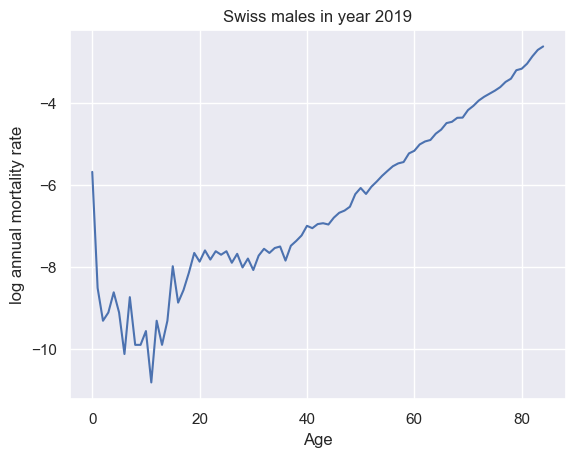

In [3]:
qx = np.array([3.3900e-03,2.0000e-04,9.0000e-05,1.1000e-04,1.8000e-04,1.1000e-04, 4.0000e-05,1.6000e-04,5.0000e-05,5.0000e-05,7.0000e-05,2.0000e-05,
 9.0000e-05,5.0000e-05,9.0000e-05,3.4000e-04,1.4000e-04,1.9000e-04, 2.9000e-04,4.7000e-04,3.8000e-04,5.0000e-04,4.0000e-04,4.9000e-04,
 4.5000e-04,4.9000e-04,3.7000e-04,4.6000e-04,3.3000e-04,4.1000e-04, 3.1000e-04,4.4000e-04,5.2000e-04,4.7000e-04,5.3000e-04,5.5000e-04,
 3.9000e-04,5.6000e-04,6.3000e-04,7.2000e-04,9.1000e-04,8.6000e-04, 9.5000e-04,9.7000e-04,9.4000e-04,1.1100e-03,1.2500e-03,1.3200e-03,
 1.4500e-03,1.9700e-03,2.2900e-03,1.9800e-03,2.3600e-03,2.6800e-03, 3.0800e-03,3.4700e-03,3.8900e-03,4.1700e-03,4.3100e-03,5.3200e-03,
 5.6700e-03,6.6200e-03,7.1200e-03,7.3800e-03,8.6100e-03,9.5000e-03, 1.1140e-02,1.1490e-02,1.2670e-02,1.2730e-02,1.5300e-02,1.6960e-02,
 1.9290e-02,2.1150e-02,2.2790e-02,2.4540e-02,2.6770e-02,3.0400e-02, 3.2880e-02,4.0410e-02,4.1910e-02,4.7380e-02,5.6770e-02,6.6290e-02,
 7.2150e-02,8.2240e-02,9.6120e-02,1.0834e-01,1.2484e-01,1.3984e-01, 1.5434e-01,1.7482e-01,1.9335e-01,2.1427e-01,2.2078e-01,2.6159e-01,
 2.8584e-01,3.1061e-01,3.3564e-01,3.6064e-01,3.8533e-01,4.0946e-01, 4.3277e-01,4.5506e-01,4.7616e-01,4.9595e-01,5.1433e-01,5.3128e-01, 5.4679e-01,5.6087e-01])
age_range_ext = np.arange(0, 85)
sns.set()
plt.plot(age_range_ext, np.log(qx[age_range_ext]))
plt.xlabel('Age')
plt.ylabel('log annual mortality rate')
plt.title('Swiss males in year 2019')
plt.show()

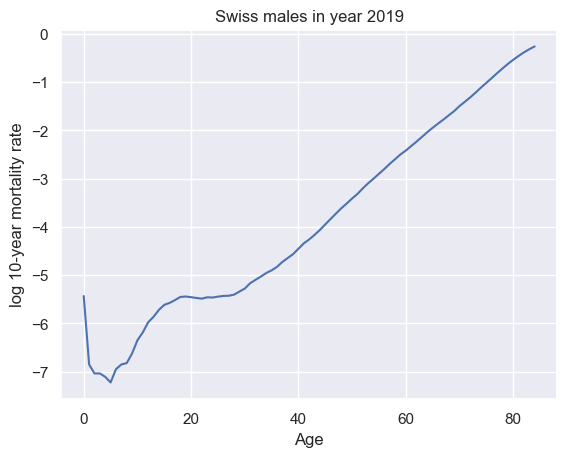

In [4]:
qx10 = 1 - np.prod(1-np.lib.stride_tricks.sliding_window_view(qx, 10), axis = 1)
plt.plot(age_range_ext, np.log(qx10[age_range_ext]))
plt.xlabel('Age')
plt.ylabel('log 10-year mortality rate')
plt.title('Swiss males in year 2019')
plt.show()

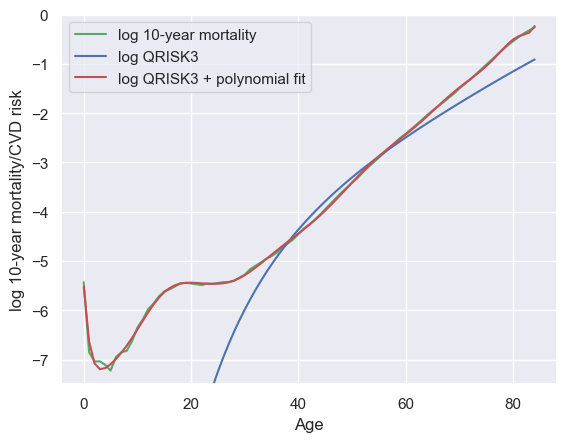

In [5]:
max_T         = 10
age           = 35
gender        = "male"
height        = 180
weight        = 75   # body-mass-index BMI = weight/height^2 = 23.1kg/m^2
tcl_hdl_ratio = 3.5  # the ratio of total cholesterol level (TCL) to high density lipoprotein (HDL) cholesterol level (the "good" cholesterol), values below 3.5 are considered very good
sbp           = 120  # systolic blood pressure, unit mmHg
sd_sbp        = 10   # the standard deviation of SBP measurements

bmi_range = np.arange(18, 40, 0.5)
sbp_range = np.arange(110, 150, 1)
age_range = np.arange(25, 85, 1)

qrisk = qrisk3(age_range_ext, gender, height, weight, tcl_hdl_ratio, sbp, sd_sbp)
plt.plot(age_range_ext, np.log(qx10[age_range_ext]), 'g')
plt.plot(age_range_ext, np.log(qrisk[age_range_ext]), 'b')
plt.ylim(-7.5, 0)
polyfit = np.polyfit(age_range_ext, np.log(qx10[age_range_ext])-np.log(qrisk), 14)
residual = np.poly1d(polyfit)
plt.plot(age_range_ext, residual(age_range_ext) + np.log(qrisk), 'r')
plt.xlabel('Age')
plt.ylabel('log 10-year mortality/CVD risk')
plt.legend(['log 10-year mortality', 'log QRISK3', 'log QRISK3 + polynomial fit'])
plt.show()

In [6]:
def qrisk3_ext(age, gender, height, weight, tcl_hdl_ratio, sbp, sd_sbp, num1, num2, num3, binary):
  q = np.exp(np.log(qrisk3(age, gender, height, weight, tcl_hdl_ratio, sbp, sd_sbp)) + residual(age)
  + 16*(num1-0.5)**4 + 4*(num2-0.5)**2*num3 + num3 + binary - 1.65)
  return np.maximum(0.0001, np.minimum(q, 1))

In [7]:
def draw_T(mu):
  beta = 0.095 # assuming increase of risk of around 10% per year
  # bisection approach to obtain alpha
  alpha_lb = 0
  alpha_ub = 1
  while (alpha_ub - alpha_lb > 0.000005):
    if np.exp((alpha_ub + alpha_lb)/2*(1-np.exp(max_T*beta))/beta) > 1 - mu:
      alpha_lb = (alpha_ub + alpha_lb)/2
    else:
      alpha_ub = (alpha_ub + alpha_lb)/2
  alpha = (alpha_ub + alpha_lb)/2
  t_lb = 0
  t_ub = max_T
  r = np.random.uniform(0, 1)
  # inversion of 1 - survival curve by bisection
  while (t_ub - t_lb > 0.01):
    if (1 - np.exp(alpha*(1 - np.exp((t_ub + t_lb)/2*beta))/beta))/mu < r:
      t_lb = (t_ub + t_lb)/2
    else:
      t_ub = (t_ub + t_lb)/2
  return (t_ub + t_lb)/2

In [8]:
tcl_hdl_ratio_range = np.arange(2.5, 7.5, 0.5)
sd_sbp_range = np.arange(5, 15.5, 0.5)
num1_range = np.arange(0, 1.05, 0.05)
num2_range = np.arange(0, 1.05, 0.05)
num3_range = np.arange(0, 1.05, 0.05)

Number of events:        144773
Number of individuals:   1376395
Number of person years:  12959172


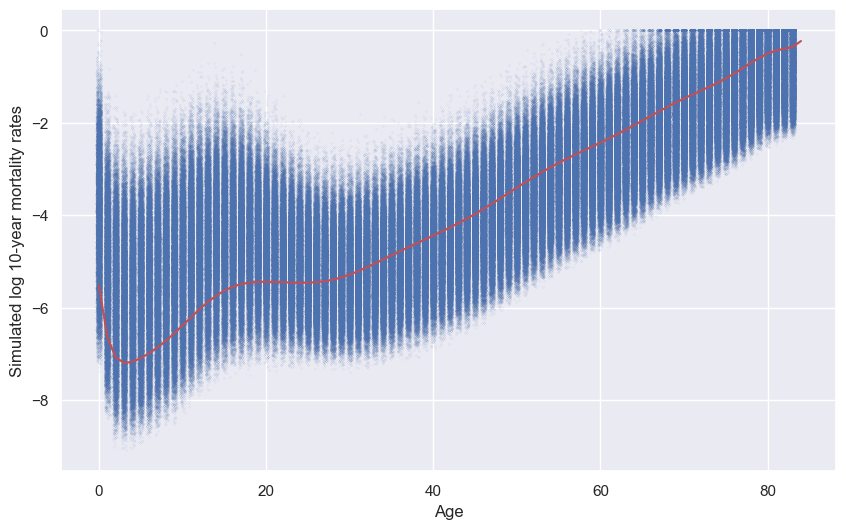

In [9]:
persons = 2000000
D2 = pd.DataFrame(index = range(persons), columns = ['AGE', 'GENDER', 'BMI', 'SBP', 'TCL_HDL_RATIO', 'SD_SBP', 'NUM1', 'NUM2', 'NUM3', 'BINARY', 'mu', 'T', 'event'])
np.random.seed(0)
sbp_bmi = np.random.multivariate_normal([125, 3.2], np.matmul(np.matmul(np.diag([15, 0.25]), np.array([[1, 0.25], [0.25, 1]])), np.diag([15, 0.25])), size=persons)
D2.SBP = sbp_bmi[:,0]
D2.BMI = np.exp(sbp_bmi[:,1])
D2.AGE = np.random.uniform(low=0, high=84, size=persons).astype(int)
D2.GENDER = np.random.binomial(1, 0.5, size=persons)
D2.TCL_HDL_RATIO = np.random.uniform(low=min(tcl_hdl_ratio_range), high=max(tcl_hdl_ratio_range), size=persons)
D2.SD_SBP = np.random.uniform(low=min(sd_sbp_range), high=max(sd_sbp_range), size=persons)
D2.NUM1 = np.random.uniform(low=0, high=1, size=persons)
D2.NUM2 = np.random.uniform(low=0, high=1, size=persons)
D2.NUM3 = np.random.uniform(low=0, high=1, size=persons)
D2.BINARY = np.round((D2.NUM3 + 3*np.random.uniform(low=0, high=1, size=persons))/4)
q_male = qrisk3_ext(D2.AGE, "male", height, np.exp(sbp_bmi[:,1])*(height/100)**2, D2.TCL_HDL_RATIO, sbp_bmi[:,0], D2.SD_SBP, D2.NUM1, D2.NUM2, D2.NUM3, D2.BINARY)
D2.mu = qrisk3_ext(D2.AGE, "female", height, np.exp(sbp_bmi[:,1])*(height/100)**2, D2.TCL_HDL_RATIO, sbp_bmi[:,0], D2.SD_SBP, D2.NUM1, D2.NUM2, D2.NUM3, D2.BINARY)
D2.loc[D2.GENDER == 0, "mu"] = q_male[D2.GENDER == 0]
D2.event = np.where(np.random.uniform(0, 1, persons) < D2.mu, 1, 0)
D2["T"] = D2.apply(lambda row : max_T if row.event == 0 else draw_T(row.mu), axis=1)
D2 = D2[(D2.SBP>=min(sbp_range)) & (D2.SBP<=max(sbp_range)) & (D2.BMI>=min(bmi_range)) & (D2.BMI<=max(bmi_range))].reset_index()

print("Number of events:       ", np.sum(D2.event))
print("Number of individuals:  ", len(D2))
print("Number of person years: ", int(np.sum(D2["T"])))

# min-max scaling covariates
D2['BMI_scaled'] = (D2.BMI-min(bmi_range))/(max(bmi_range)-min(bmi_range))
D2['SBP_scaled'] = (D2.SBP-min(sbp_range))/(max(sbp_range)-min(sbp_range))
D2['SD_SBP_scaled'] = (D2.SD_SBP-min(sd_sbp_range))/(max(sd_sbp_range)-min(sd_sbp_range))
D2['TCL_HDL_RATIO_scaled'] = (D2.TCL_HDL_RATIO-min(tcl_hdl_ratio_range))/(max(tcl_hdl_ratio_range)-min(tcl_hdl_ratio_range))

plt.figure(figsize=(10,6))
plt.plot(D2.AGE + np.random.uniform(-0.3, 0.3, len(D2)), np.log(D2.mu), 'b.', markersize=0.1)
plt.plot(age_range_ext, residual(age_range_ext) + np.log(qrisk), 'r')
plt.xlabel('Age')
plt.ylabel('Simulated log 10-year mortality rates')
plt.show()

D2.to_csv('data/D2.csv', index=False)

In [10]:
D2

,index,AGE,GENDER,BMI,SBP,TCL_HDL_RATIO,SD_SBP,NUM1,NUM2,NUM3,BINARY,mu,T,event,BMI_scaled,SBP_scaled,SD_SBP_scaled,TCL_HDL_RATIO_scaled
0,3,49,0,22.286183,110.748826,3.982616,11.923312,0.302983,0.807917,0.970089,0.0,0.022026,3.325195,1,0.199357,0.019201,0.692331,0.329470
1,4,58,0,27.271473,126.547869,6.268732,6.155875,0.302030,0.977253,0.969042,1.0,0.411592,4.389648,1,0.431231,0.424304,0.115587,0.837496
2,5,82,0,34.570903,122.837879,5.892966,8.646372,0.315338,0.068236,0.132202,1.0,0.596945,8.159180,1,0.770740,0.329176,0.364637,0.753992
3,6,30,1,24.091885,113.584311,5.934155,6.951186,0.639465,0.513677,0.747794,1.0,0.006285,10.000000,0,0.283344,0.091905,0.195119,0.763146
4,7,41,1,25.868334,118.341715,4.832708,6.096296,0.758591,0.533074,0.841474,1.0,0.011583,10.000000,0,0.365969,0.213890,0.109630,0.518380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376390,1999992,22,0,19.408661,144.621608,5.794807,7.269997,0.884179,0.278386,0.409219,0.0,0.004659,10.000000,0,0.065519,0.887734,0.227000,0.732179
1376391,1999994,72,1,26.498342,113.990817,4.531352,11.910375,0.085940,0.808494,0.030989,1.0,0.185639,10.000000,0,0.395272,0.102329,0.691038,0.451412
1376392,1999996,7,1,24.351281,126.323347,5.333354,5.955099,0.119152,0.511268,0.939248,1.0,0.021910,10.000000,0,0.295408,0.418547,0.095510,0.629634
1376393,1999997,1,0,24.670228,115.525113,6.083880,9.412671,0.370932,0.378601,0.258781,1.0,0.001430,10.000000,0,0.310243,0.141670,0.441267,0.796418


In [11]:
# Generate a dataset where for each covariate we have seq_len = 3 observations
D3 = D2.copy()
D3["ID"] = np.arange(len(D3))

n_samples = len(D3)
seq_len = 3
eps_bmi = 1
eps_sbp = 0.5
eps_tcl_hdl_ratio = 0.05

# Features to include in each timestep
features = ["AGE", "GENDER", "BMI", "SBP", "TCL_HDL_RATIO", "SD_SBP", "NUM1", "NUM2", "NUM3", "BINARY"]
n_features = len(features)

# Create 3D model inputs: [n_samples, seq_len, n_features]
X_seq = np.zeros((n_samples, seq_len, n_features), dtype=np.float32)

# Create target variables
times = np.zeros(n_samples)
events = np.zeros(n_samples)
mu = np.zeros(n_samples)

np.random.seed(0)

# Generate sequences
for j, row in D3.iterrows():
    age_seq = row["AGE"] - np.arange(seq_len)
    gender_seq = np.full(seq_len, row["GENDER"])
    sd_sbp_seq = np.full(seq_len, row["SD_SBP"])
    num1_seq = np.full(seq_len, row["NUM1"])
    num2_seq = np.full(seq_len, row["NUM2"])
    num3_seq = np.full(seq_len, row["NUM3"])
    binary_seq = np.full(seq_len, row["BINARY"])

    # Simulate longitudinal data
    bmi_noise = np.random.normal(0, eps_bmi, seq_len).cumsum()
    sbp_noise = np.random.normal(0, eps_sbp, seq_len).cumsum()
    tcl_hdl_noise = np.random.normal(0, eps_tcl_hdl_ratio, seq_len).cumsum()

    bmi_seq = row["BMI"] + bmi_noise
    sbp_seq = row["SBP"] + sbp_noise
    tcl_hdl_seq = row["TCL_HDL_RATIO"] + tcl_hdl_noise

    # Stack features into one sequence: shape [seq_len, n_features]
    seq = np.stack([
        age_seq,
        gender_seq,
        bmi_seq,
        sbp_seq,
        tcl_hdl_seq,
        sd_sbp_seq,
        num1_seq,
        num2_seq,
        num3_seq,
        binary_seq
    ], axis=-1)

    X_seq[j] = seq

    if row["GENDER"] == 0:
        mu[j] = qrisk3_ext(row["AGE"], "male", height, (row["BMI"]+np.max(bmi_noise))*(height/100)**2, row["TCL_HDL_RATIO"], row["SBP"], row["SD_SBP"], row["NUM1"], row["NUM2"], row["NUM3"], row["BINARY"])
    else:
        mu[j] = qrisk3_ext(row["AGE"], "female", height, (row["BMI"]+np.max(bmi_noise))*(height/100)**2, row["TCL_HDL_RATIO"], row["SBP"], row["SD_SBP"], row["NUM1"], row["NUM2"], row["NUM3"], row["BINARY"])
    events[j] = 1 if np.random.uniform(0, 1, 1) < mu[j] else 0
    times[j] = max_T if events[j] == 0 else draw_T(mu[j])

In [12]:
np.save("data/D3_X_seq.npy", X_seq)
np.save("data/D3_events.npy", events)
np.save("data/D3_times.npy", times)
np.save("data/D3_mu.npy", mu)